In [4]:
import macosko2015
macosko2015.__version__

'1.0.0'

In [3]:
macosko2015.load_amacrine()

FileNotFoundError: File b'/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/macosko2015/data/05_make_rentina_subsets_for_teaching/amacrine_expression.csv' does not exist

In [ ]:
import os
import common

# Assign notebook and folder names
notebook_name = '02_robust_pca'
figure_folder = os.path.join(common.FIGURE_FOLDER, notebook_name)
data_folder = os.path.join(common.DATA_FOLDER, notebook_name)

# Make the folders
! mkdir -p $figure_folder
! mkdir -p $data_folder

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
table1 = pd.read_table('/Users/olgabot/Downloads/GSE63473_RAW/GSM1626793_P14Retina_1.digital_expression.txt.gz', 
                       compression='gzip', index_col=0)
print(table1.shape)
table1.head()

(20478, 6600)


,GGCCGCAGTCCG,CTTGTGCGGGAA,GCGCAACTGCTC,GATTGGGAGGCA,CCTCCTAGTTGG,AGTCAAGCCCTC,GTGCCGCCTCTC,CCTGTGACACAC,AATCTCGTTAAT,GATTTCCTCTGA,...,GATTTAATGGTA,TGTAAGGATCCG,GAGTGGCTTGAT,GCATCTTTCAGG,ACACGAGTTTGG,CACCCAGTTTCG,CCTGGAGAGTTT,TCTTCACTCTTA,GCCGTCTTACTA,GACCAAACTAAT
gene,,,,,,,,,,,,,,,,,,,,,
10:100015630-100100413:Kitl,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10:100443902-100487350:Tmtc3,3,0,0,0,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10:100488289-100573655:Cep290,1,3,0,2,1,18,10,3,4,3,...,4,0,3,0,0,0,0,2,0,1
10:100572274-100589259:4930430F08Rik,2,1,2,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10:100592386-100618391:1700017N19Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


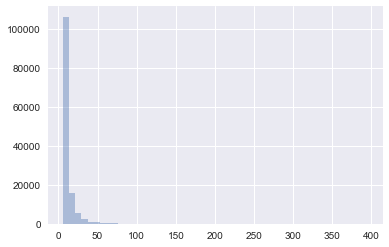

In [8]:
data = table1.values
mask = data > 5

sns.distplot(data[mask].flat, kde=False)

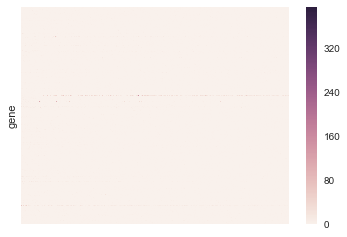

In [9]:
mask = table1 == 0
sns.heatmap(table1, xticklabels=[], yticklabels=[], mask=mask)
fig = plt.gcf()
fig.savefig('table1_heatmap.png')

In [10]:
n_transcripts_per_cell = table1.sum()
n_transcripts_per_cell.head()

GGCCGCAGTCCG    37519
CTTGTGCGGGAA    32077
GCGCAACTGCTC    28162
GATTGGGAGGCA    20384
CCTCCTAGTTGG    19571
dtype: int64

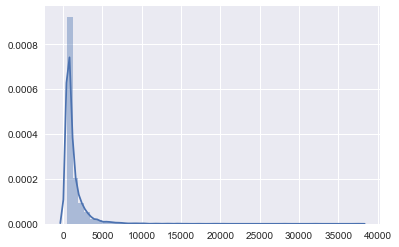

In [11]:
sns.distplot(n_transcripts_per_cell)

In [12]:
n_transcripts_per_cell.describe()

count     6600.000000
mean      1332.358939
std       1572.921791
min        466.000000
25%        578.000000
50%        821.000000
75%       1452.250000
max      37519.000000
dtype: float64

In [13]:
n_expressed_genes_per_cell = (table1 > 0).sum()
n_expressed_genes_per_cell.head()

GGCCGCAGTCCG    7254
CTTGTGCGGGAA    6945
GCGCAACTGCTC    6404
GATTGGGAGGCA    5751
CCTCCTAGTTGG    5785
dtype: int64

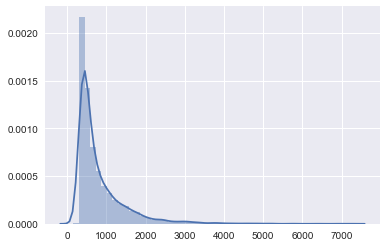

In [14]:
sns.distplot(n_expressed_genes_per_cell)

In [15]:
greater500 = (table1 > 100).sum(axis=1) > 1
greater500.sum()

23

In [16]:
table1_t = table1.T
print(table1_t.shape)
table1_t.head()

(6600, 20478)


gene,10:100015630-100100413:Kitl,10:100443902-100487350:Tmtc3,10:100488289-100573655:Cep290,10:100572274-100589259:4930430F08Rik,10:100592386-100618391:1700017N19Rik,10:101681487-102391469:Mgat4c,10:102512222-102546560:Rassf9,10:103063198-103236322:Lrriq1,10:10335703-10472326:Adgb,10:103367808-103419378:Slc6a15,...,X:99136130-99148991:Efnb1,X:99465734-99471273:Pja1,X:99821021-99848790:Tmem28,X:99975606-100400762:Eda,Y:1010543-1028847:Eif2s3y,Y:10640942-10643315:Gm20775,Y:1096861-1245759:Uty,Y:1260715-1286613:Ddx3y,Y:897788-943811:Kdm5d,Y:991630-991748:n-R5s1
GGCCGCAGTCCG,0,3,1,2,0,0,0,0,0,4,...,0,8,1,0,0,0,0,0,0,0
CTTGTGCGGGAA,0,0,3,1,0,0,0,0,0,1,...,0,9,0,0,2,0,1,5,0,0
GCGCAACTGCTC,1,0,0,2,0,4,0,0,0,3,...,1,11,0,0,0,0,0,0,0,0
GATTGGGAGGCA,0,0,2,0,0,1,0,0,0,2,...,1,2,0,0,3,0,1,0,0,0
CCTCCTAGTTGG,0,2,1,1,0,2,0,0,0,1,...,0,3,0,0,0,0,0,0,0,0


In [17]:
n_transcripts_per_gene = table1_t.sum()
n_transcripts_per_gene.head()

gene
10:100015630-100100413:Kitl              131
10:100443902-100487350:Tmtc3             434
10:100488289-100573655:Cep290           4389
10:100572274-100589259:4930430F08Rik     527
10:100592386-100618391:1700017N19Rik      16
dtype: int64

In [18]:
n_transcripts_per_gene = table1_t.sum()
n_transcripts_per_gene.head()

gene
10:100015630-100100413:Kitl              131
10:100443902-100487350:Tmtc3             434
10:100488289-100573655:Cep290           4389
10:100572274-100589259:4930430F08Rik     527
10:100592386-100618391:1700017N19Rik      16
dtype: int64

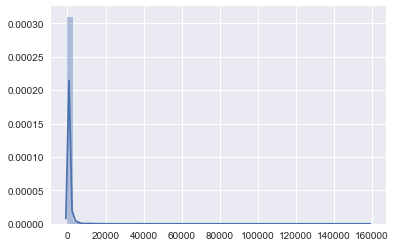

In [19]:
sns.distplot(n_transcripts_per_gene)

## Subset the genes based on their total number of transcripts

In [20]:
(n_transcripts_per_gene > 1e3).sum()

2041

In [21]:
n_transcripts_per_gene[n_transcripts_per_gene > 1e4]

gene
10:108497650-109010982:Syt1            17227
10:86690209-86705509:Hsp90b1           12175
10:98915152-99026143:Atp2b1            10137
11:106780355-106789185:Ddx5            16403
11:116021912-116027962:H3f3b           13245
11:120447605-120453500:Pde6g           28298
11:62551171-62553213:Ubb               11151
11:67695326-67703333:Rcvrn             22902
11:78343482-78349164:Unc119            13936
11:94287890-94321988:Luc7l3            11121
12:100199435-100209806:Calm1           34885
12:109541001-109571726:Meg3            18699
12:110690605-110702728:Hsp90aa1        17151
12:111669355-111672338:Ckb             12471
14:52110704-52163546:Rpgrip1           22525
14:55518978-55524981:Nrl               10515
14:64588115-64593959:A930011O12Rik     12209
16:91647506-91679221:Son               12407
16:94370618-94469222:Ttc3              10199
16:96120618-96127729:Hmgn1             19479
17:28351515-28365182:Tulp1             20794
17:45567775-45573271:Hsp90ab1          11576
17:46

## Look at gene's median transcript count

In [22]:
median_transcripts_per_gene = table1_t.median()
median_transcripts_per_gene.head()

gene
10:100015630-100100413:Kitl             0.0
10:100443902-100487350:Tmtc3            0.0
10:100488289-100573655:Cep290           0.0
10:100572274-100589259:4930430F08Rik    0.0
10:100592386-100618391:1700017N19Rik    0.0
dtype: float64

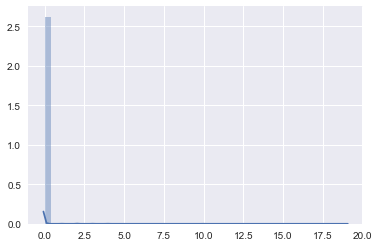

In [23]:
sns.distplot(median_transcripts_per_gene)
fig = plt.gcf()
fig.savefig('median_transcripts_per_gene.png')

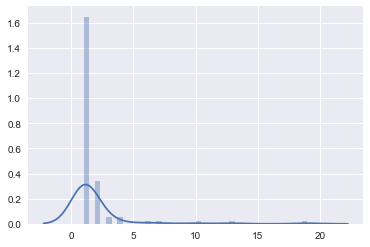

In [24]:
data = median_transcripts_per_gene
mask = data > 0

sns.distplot(data[mask])
fig = plt.gcf()
fig.savefig('median_transcripts_per_gene_greater0.png')


## Clean data matrix to be compatible with the cluster labels and identities

Currently, cells are labeled by their barcode, e.g. `GCGCAACTGCTC`, and genes are labeled by their chrom:start-end:symbol, e.g. `6:51460434-51469894:Hnrnpa2b1`. But, in the supplementary data, the genes are all uppercase, e.g. `HNRNPA2B1` (which is incorrect since this is mouse data.. ) and the barcodes have `r1_` prepended before the id, e.g. `r1_GCGCAACTGCTC`.

So we need to clean the data to be compatible with this

In [29]:
gene_symbols = table1_t.columns.map(lambda x: x.split(':')[-1].upper())
gene_symbols.name = 'symbol'
table1_t.columnsmns = gene_symbols
table1_t.head()

symbol,KITL,TMTC3,CEP290,4930430F08RIK,1700017N19RIK,MGAT4C,RASSF9,LRRIQ1,ADGB,SLC6A15,...,EFNB1,PJA1,TMEM28,EDA,EIF2S3Y,GM20775,UTY,DDX3Y,KDM5D,N-R5S1
symbol,,,,,,,,,,,,,,,,,,,,,
GGCCGCAGTCCG,0,3,1,2,0,0,0,0,0,4,...,0,8,1,0,0,0,0,0,0,0
CTTGTGCGGGAA,0,0,3,1,0,0,0,0,0,1,...,0,9,0,0,2,0,1,5,0,0
GCGCAACTGCTC,1,0,0,2,0,4,0,0,0,3,...,1,11,0,0,0,0,0,0,0,0
GATTGGGAGGCA,0,0,2,0,0,1,0,0,0,2,...,1,2,0,0,3,0,1,0,0,0
CCTCCTAGTTGG,0,2,1,1,0,2,0,0,0,1,...,0,3,0,0,0,0,0,0,0,0


In [30]:
barcodes = 'r1_' + table1_t.index
barcodes.name = 'barcode'
table1_t.index = barcodes
table1_t.head()

symbol,KITL,TMTC3,CEP290,4930430F08RIK,1700017N19RIK,MGAT4C,RASSF9,LRRIQ1,ADGB,SLC6A15,...,EFNB1,PJA1,TMEM28,EDA,EIF2S3Y,GM20775,UTY,DDX3Y,KDM5D,N-R5S1
barcode,,,,,,,,,,,,,,,,,,,,,
r1_GGCCGCAGTCCG,0,3,1,2,0,0,0,0,0,4,...,0,8,1,0,0,0,0,0,0,0
r1_CTTGTGCGGGAA,0,0,3,1,0,0,0,0,0,1,...,0,9,0,0,2,0,1,5,0,0
r1_GCGCAACTGCTC,1,0,0,2,0,4,0,0,0,3,...,1,11,0,0,0,0,0,0,0,0
r1_GATTGGGAGGCA,0,0,2,0,0,1,0,0,0,2,...,1,2,0,0,3,0,1,0,0,0
r1_CCTCCTAGTTGG,0,2,1,1,0,2,0,0,0,1,...,0,3,0,0,0,0,0,0,0,0


In [32]:
table1_t.to_csv('expression_table1.csv')